<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=RqhTzEVkfBQ


In [0]:
!pip install autoviml

In [0]:
!pip install shap

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [0]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
size = int(0.7*churn_df.shape[0])
train_df = churn_df[:size]
test_df = churn_df[size:]

In [0]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.470. Call using: 
             m, feats, trainm, testm = Auto_ViML(train, target, test, 
                                    sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False, 
                                    verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'


In [0]:
target='Churn'

Train (Size: 4930,21) has Single_Label with target: ['Churn']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
   Yes:    1289  ->   26.1%
    No:    3641  ->   73.9%
Selecting Binary_Classification Classifier...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This will take time...
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    20 Predictors classified...
        This does not include the

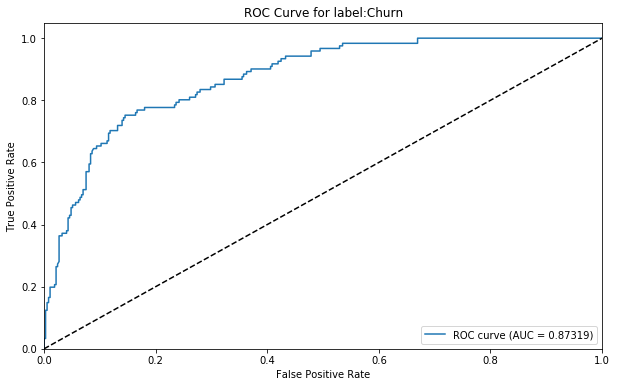

Average precision-recall score: 0.77
Macro F1 score, averaged over all classes: 0.74


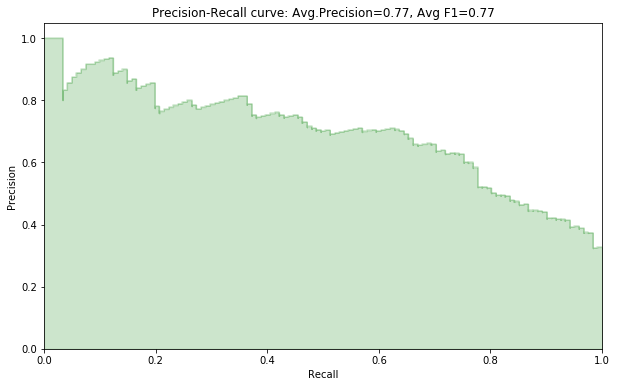

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 73.116%
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       372
           1       0.66      0.55      0.60       121

    accuracy                           0.82       493
   macro avg       0.76      0.73      0.74       493
weighted avg       0.81      0.82      0.82       493

[[338  34]
 [ 54  67]]

Ensembling Models is better than Single Model for this data set.


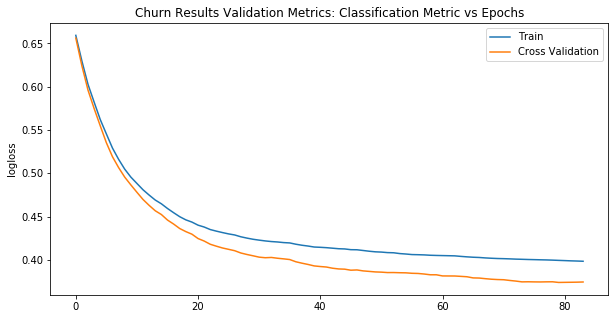

    Time taken for this Target (in seconds) = 31


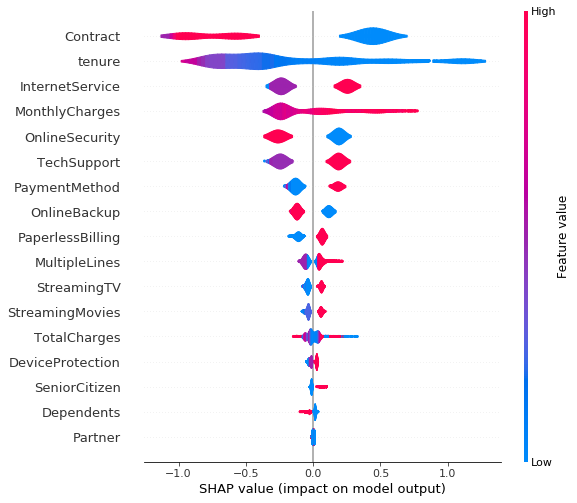

Plotting SHAP (SHapley Additive exPlanations) values to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin

Imbalanced Class Training using Majority Class Downsampling method...
Rare Class = 1
    Pct of Rare Class in data = 26.15%
    Number of iterations for training =  1
This is not an Imbalanced data set. Training in one batch...
Model Training time taken in seconds = 1
Test Data predictions using Threshold = 0.5
QuickML_Ensembling completed.
    Time taken for Ensembling: 2.3 seconds
########################################################
Completed Ensemble predictions on held out data
    Saving predictions to ./Churn/Churn_Binary_Classification_test_modified.csv
    Saving predictions to ./Churn/Churn_Binary_Classification_submission.csv
    Saving predictions t

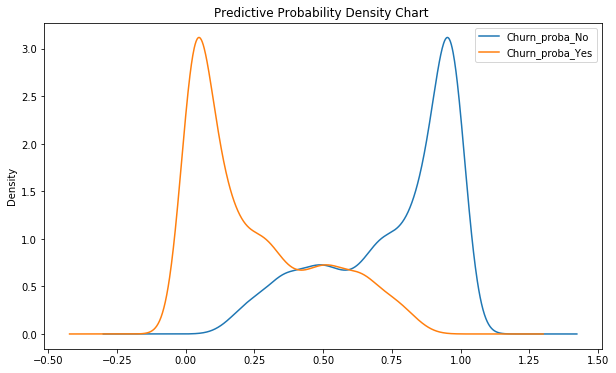

In [0]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [0]:
features

['Contract',
 'TechSupport',
 'OnlineSecurity',
 'InternetService',
 'tenure',
 'PaymentMethod',
 'PaperlessBilling',
 'MonthlyCharges',
 'StreamingMovies',
 'OnlineBackup',
 'MultipleLines',
 'StreamingTV',
 'SeniorCitizen',
 'TotalCharges',
 'Dependents',
 'DeviceProtection',
 'Partner']

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
testm

,Contract,TechSupport,OnlineSecurity,InternetService,tenure,PaymentMethod,PaperlessBilling,MonthlyCharges,StreamingMovies,OnlineBackup,MultipleLines,StreamingTV,SeniorCitizen,TotalCharges,Dependents,DeviceProtection,Partner,Churn_proba_No,Churn_proba_Yes,Churn_Logistic Regression_predictions,Churn_Linear Discriminant_predictions,Churn_Naive Bayes_predictions,Churn_Bagging_predictions,Churn_XGBoost_predictions,Churn_Ensembled_predictions
4930,0,2,0,0,1,2,1,0.261692,0,0,1,0,0,2190,0,2,0,0.436480,0.563520,Yes,Yes,Yes,No,Yes,Yes
4931,0,0,0,2,15,3,1,0.847761,2,0,0,2,0,4654,0,0,1,0.348952,0.651048,Yes,Yes,Yes,Yes,Yes,Yes
4932,2,2,2,2,27,2,1,0.620896,0,2,1,0,0,4655,1,2,1,0.901374,0.098626,No,No,No,No,No,No
4933,0,2,2,0,4,0,1,0.387562,2,2,2,2,0,4656,1,0,0,0.749450,0.250550,No,No,No,No,No,No
4934,1,2,2,2,72,3,1,0.920398,2,2,0,2,0,4657,0,0,1,0.918669,0.081331,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,0,2,0,24,0,1,0.662189,2,0,0,2,0,6526,1,0,1,0.936400,0.063600,No,No,No,No,No,No
7039,2,2,0,2,72,2,1,0.845274,2,2,0,2,0,6527,1,0,1,0.869285,0.130715,No,No,No,No,No,No
7040,0,2,2,0,11,3,1,0.112935,0,0,2,0,0,6528,1,2,1,0.789141,0.210859,No,No,No,No,No,No
7041,0,2,0,2,4,0,1,0.558706,0,0,0,0,1,6529,0,2,1,0.394023,0.605977,Yes,Yes,Yes,Yes,Yes,Yes


In [0]:
 print(confusion_matrix(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

[[1408  125]
 [ 307  273]]


In [0]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Logistic Regression_predictions'].values))

[[1405  128]
 [ 299  281]]


In [0]:
 print(confusion_matrix(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

[[1376  157]
 [ 278  302]]


In [0]:
print(classification_report(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1533
         Yes       0.69      0.47      0.56       580

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [0]:
print(classification_report(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1533
         Yes       0.66      0.52      0.58       580

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

